<a href="https://colab.research.google.com/github/tonygk4u/Tradingbeginner/blob/master/strategy_helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install nsepy
from nsepy import get_history
from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd

In [0]:
symbol="ADANIPORT"
enddate = date.today()
startdate = date.today() - timedelta(days=365)
data = get_history(symbol=symbol, start=startdate, end=enddate)
data.head()

# Initialize the short and long windows
short_window = 40
long_window = 100
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

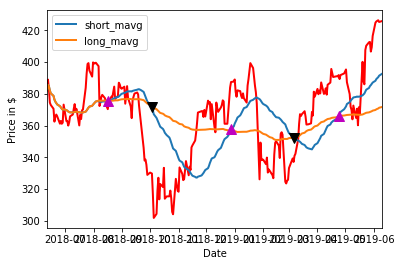

<Figure size 1440x720 with 0 Axes>

In [6]:
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.figure(figsize=(20,10))
# Show the plot
plt.show()